In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,262 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 119637 files and direc

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.rc('font', family='NanumBarunGothic')
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

## complit_data.csv: GPT를 활용해서 대한민국 고용 통계 및 평균 소득 통계를 반영한 데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/최종프로젝트_ AI엔지니어링/유저분류 클러스터링 모델/finalF-20241114T083026Z-001/finalF/complit_data.csv')
df.head()

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,투자자산
0,1,남자,60대,Y,383,10305.0,8072.0,6206.0,2233
1,2,여자,30대,Y,383,16429.0,6865.0,11317.0,9564
2,3,남자,40대,Y,577,13377.0,9521.0,12531.0,3856
3,4,여자,10대,N,147,0.0,0.0,0.0,0
4,5,남자,60대,Y,383,18661.0,8072.0,6206.0,10589


In [ ]:
# 연령대별 예금보유액 설정
savings_by_age = {
    '20대': 923,
    '30대': 1500,
    '40대': 2500,
    '50대': 3000,
    '60대': 5000
}

# '예금보유액' 컬럼 추가: 나이에 따라 지정된 값을 할당
df['예금보유액'] = df['나이'].map(savings_by_age)
df

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,투자자산,예금보유액
0,1,남자,60대,Y,383,10305.0,8072.0,6206.0,2233,5000.0
1,2,여자,30대,Y,383,16429.0,6865.0,11317.0,9564,1500.0
2,3,남자,40대,Y,577,13377.0,9521.0,12531.0,3856,2500.0
3,4,여자,10대,N,147,0.0,0.0,0.0,0,NaN
4,5,남자,60대,Y,383,18661.0,8072.0,6206.0,10589,5000.0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,여자,50대,Y,306,14363.0,11597.0,10715.0,2766,3000.0
99996,99997,남자,30대,Y,461,18450.0,6865.0,11317.0,11585,1500.0
99997,99998,여자,20대,Y,286,8911.0,3073.0,4708.0,5838,923.0
99998,99999,남자,20대,N,310,13569.0,3073.0,4708.0,10496,923.0


## 예금보유액 수정

통계적 논리 -> 범위는 평균 값의 표준편차 활용

평균 값 +- (3 * 평균 값 * 0.25)

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# 수정 대상 필터링
data_20s = df['나이'] == '20대'
data_30s = df['나이'] == '30대'
data_40s = df['나이'] == '40대'
data_50s = df['나이'] == '50대'
data_60s = df['나이'] == '60대'


# 예금보유액 범위 설정
min_savings_20_r = 923 - (3 * 923 * 0.25)
max_savings_20_r = 923 + (3 * 923 * 0.25)

min_savings_30_r = 1687 - (3 * 1687 * 0.25)
max_savings_30_r = 1687 + (3 * 1687 * 0.25)

min_savings_40_r = 2229 - (3 * 2229 * 0.25)
max_savings_40_r = 2229 + (3 * 2229 * 0.25)

min_savings_50_r = 2851 - (3 * 2851 * 0.25)
max_savings_50_r = 2851 + (3 * 2851 * 0.25)

min_savings_60_r = 3184 - (3 * 3184 * 0.25)
max_savings_60_r = 3184 + (3 * 3184 * 0.25)

# 연령별로대- 저축액 컬럼을 범위 내 랜덤 값으로 수정
df.loc[data_20s, '예금보유액'] = np.random.randint(min_savings_20_r, max_savings_20_r + 1, size=data_20s.sum())
df.loc[data_30s, '예금보유액'] = np.random.randint(min_savings_30_r, max_savings_30_r + 1, size=data_30s.sum())
df.loc[data_40s, '예금보유액'] = np.random.randint(min_savings_40_r, max_savings_40_r + 1, size=data_40s.sum())
df.loc[data_50s, '예금보유액'] = np.random.randint(min_savings_50_r, max_savings_50_r + 1, size=data_50s.sum())
df.loc[data_60s, '예금보유액'] = np.random.randint(min_savings_60_r, max_savings_60_r + 1, size=data_60s.sum())




## 펀드보유액 컬럼 생성

In [ ]:
df['펀드보유액'] = 0

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# 수정 대상 필터링
data_20s = df['나이'] == '20대'
data_30s = df['나이'] == '30대'
data_40s = df['나이'] == '40대'
data_50s = df['나이'] == '50대'
data_60s = df['나이'] == '60대'


# 예금보유액 범위 설정
min_fund_20 = 996 - (3 * 996 * 0.25)
max_fund_20 = 996 + (3 * 996 * 0.25)

min_fund_30 = 1764 - (3 * 1764 * 0.25)
max_fund_30 = 1764 + (3 * 1764 * 0.25)

min_fund_40 = 2194 - (3 * 2194 * 0.25)
max_fund_40 = 2194 + (3 * 2194 * 0.25)

min_fund_50 = 2778 - (3 * 2778 * 0.25)
max_fund_50 = 2778 + (3 * 2778 * 0.25)

min_fund_60 = 2844 - (3 * 2844 * 0.25)
max_fund_60 = 2844 + (3 * 2844 * 0.25)

# 연령별로대- 저축액 컬럼을 범위 내 랜덤 값으로 수정
df.loc[data_20s, '펀드보유액'] = np.random.randint(min_fund_20, max_fund_20 + 1, size=data_20s.sum())
df.loc[data_30s, '펀드보유액'] = np.random.randint(min_fund_30, max_fund_30 + 1, size=data_30s.sum())
df.loc[data_40s, '펀드보유액'] = np.random.randint(min_fund_40, max_fund_40 + 1, size=data_40s.sum())
df.loc[data_50s, '펀드보유액'] = np.random.randint(min_fund_50, max_fund_50 + 1, size=data_50s.sum())
df.loc[data_60s, '펀드보유액'] = np.random.randint(min_fund_60, max_fund_60 + 1, size=data_60s.sum())

In [ ]:
df

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,투자자산,예금보유액,펀드보유액
0,1,남자,60대,Y,383,10305.0,8072.0,6206.0,2233,4110.0,2446
1,2,여자,30대,Y,383,16429.0,6865.0,11317.0,9564,1474.0,2002
2,3,남자,40대,Y,577,13377.0,9521.0,12531.0,3856,1622.0,1323
3,4,여자,10대,N,147,0.0,0.0,0.0,0,NaN,0
4,5,남자,60대,Y,383,18661.0,8072.0,6206.0,10589,1247.0,4707
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,여자,50대,Y,306,14363.0,11597.0,10715.0,2766,3808.0,2431
99996,99997,남자,30대,Y,461,18450.0,6865.0,11317.0,11585,1549.0,476
99997,99998,여자,20대,Y,286,8911.0,3073.0,4708.0,5838,1448.0,1271
99998,99999,남자,20대,N,310,13569.0,3073.0,4708.0,10496,1009.0,559


# 적금보유액 컬럼 생성

적금액: 예금 보유액 * 일정 비중

In [ ]:
# 새로운 컬럼 '적금보유액'을 0으로 초기화
df['적금보유액'] = 0

# '나이'가 '20대'인 행에 대해 '적금보유액'을 계산하여 할당
df.loc[df['나이'] == '20대', '적금보유액'] = df.loc[df['나이'] == '20대', '예금보유액'] * (40.1 / 59.5)
df.loc[df['나이'] == '30대', '적금보유액'] = df.loc[df['나이'] == '30대', '예금보유액'] * (38.4 / 61.6)
df.loc[df['나이'] == '40대', '적금보유액'] = df.loc[df['나이'] == '40대', '예금보유액'] * (26.5 / 73.5)
df.loc[df['나이'] == '50대', '적금보유액'] = df.loc[df['나이'] == '50대', '예금보유액'] * (21.2 / 78.8)
df.loc[df['나이'] == '60대', '적금보유액'] = df.loc[df['나이'] == '60대', '예금보유액'] * (18.4 / 81.6)


In [ ]:
df

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,투자자산,예금보유액,펀드보유액,적금보유액
0,1,남자,60대,Y,383,10305.0,8072.0,6206.0,2233,4110.0,2446,926.764706
1,2,여자,30대,Y,383,16429.0,6865.0,11317.0,9564,1474.0,2002,918.857143
2,3,남자,40대,Y,577,13377.0,9521.0,12531.0,3856,1622.0,1323,584.802721
3,4,여자,10대,N,147,0.0,0.0,0.0,0,NaN,0,0.000000
4,5,남자,60대,Y,383,18661.0,8072.0,6206.0,10589,1247.0,4707,281.186275
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,여자,50대,Y,306,14363.0,11597.0,10715.0,2766,3808.0,2431,1024.487310
99996,99997,남자,30대,Y,461,18450.0,6865.0,11317.0,11585,1549.0,476,965.610390
99997,99998,여자,20대,Y,286,8911.0,3073.0,4708.0,5838,1448.0,1271,975.878992
99998,99999,남자,20대,N,310,13569.0,3073.0,4708.0,10496,1009.0,559,680.015126


# 저축액 컬럼 수정

저축액 = 예금보유액 + 적금 보유액

In [ ]:
df['저축액'] = df['예금보유액'] + df['적금보유액']
df.head()

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,투자자산,예금보유액,펀드보유액,적금보유액
0,1,남자,60대,Y,383,10305.0,5036.764706,6206.0,2233,4110.0,2446,926.764706
1,2,여자,30대,Y,383,16429.0,2392.857143,11317.0,9564,1474.0,2002,918.857143
2,3,남자,40대,Y,577,13377.0,2206.802721,12531.0,3856,1622.0,1323,584.802721
3,4,여자,10대,N,147,0.0,NaN,0.0,0,NaN,0,0.000000
4,5,남자,60대,Y,383,18661.0,1528.186275,6206.0,10589,1247.0,4707,281.186275


In [ ]:
# 투자자산 컬럼을 제거

df.drop('투자자산', axis=1, inplace=True)

In [ ]:
df.head()

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,예금보유액,펀드보유액,적금보유액
0,1,남자,60대,Y,383,10305.0,5036.764706,6206.0,4110.0,2446,926.764706
1,2,여자,30대,Y,383,16429.0,2392.857143,11317.0,1474.0,2002,918.857143
2,3,남자,40대,Y,577,13377.0,2206.802721,12531.0,1622.0,1323,584.802721
3,4,여자,10대,N,147,0.0,NaN,0.0,NaN,0,0.000000
4,5,남자,60대,Y,383,18661.0,1528.186275,6206.0,1247.0,4707,281.186275


# 부채액 데이터 수정

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# 수정 대상 필터링
data_20s = df['나이'] == '20대'
data_30s = df['나이'] == '30대'
data_40s = df['나이'] == '40대'
data_50s = df['나이'] == '50대'
data_60s = df['나이'] == '60대'


# 부채액 범위 설정
min_loan_20 = 7082 - (3 * 7082 * 0.25)
max_loan_20 = 7082 + (3 * 7082 * 0.25)

min_loan_30 = 7082 - (3 * 7082 * 0.25)
max_loan_30 = 7082 + (3 * 7082 * 0.25)

min_loan_40 = 10357 - (3 * 10357 * 0.25)
max_loan_40 = 10357 + (3 * 10357 * 0.25)

min_loan_50 = 9082 - (3 * 9082 * 0.25)
max_loan_50 = 9082 + (3 * 9082 * 0.25)

min_loan_60 = 7726 - (3 * 7726 * 0.25)
max_loan_60 = 7726 + (3 * 7726 * 0.25)

# 연령별로대- 저축액 컬럼을 범위 내 랜덤 값으로 수정
df.loc[data_20s, '부채액'] = np.random.randint(min_loan_20, max_loan_20 + 1, size=data_20s.sum())
df.loc[data_30s, '부채액'] = np.random.randint(min_loan_30, max_loan_30 + 1, size=data_30s.sum())
df.loc[data_40s, '부채액'] = np.random.randint(min_loan_40, max_loan_40 + 1, size=data_40s.sum())
df.loc[data_50s, '부채액'] = np.random.randint(min_loan_50, max_loan_50 + 1, size=data_50s.sum())
df.loc[data_60s, '부채액'] = np.random.randint(min_loan_60, max_loan_60 + 1, size=data_60s.sum())

In [ ]:
df

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,예금보유액,펀드보유액,적금보유액
0,1,남자,60대,Y,383,10305.0,5036.764706,5074.0,4110.0,2446,926.764706
1,2,여자,30대,Y,383,16429.0,2392.857143,9443.0,1474.0,2002,918.857143
2,3,남자,40대,Y,577,13377.0,2206.802721,3441.0,1622.0,1323,584.802721
3,4,여자,10대,N,147,0.0,NaN,0.0,NaN,0,0.000000
4,5,남자,60대,Y,383,18661.0,1528.186275,4490.0,1247.0,4707,281.186275
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,여자,50대,Y,306,14363.0,4832.487310,6823.0,3808.0,2431,1024.487310
99996,99997,남자,30대,Y,461,18450.0,2514.610390,9114.0,1549.0,476,965.610390
99997,99998,여자,20대,Y,286,8911.0,2423.878992,3243.0,1448.0,1271,975.878992
99998,99999,남자,20대,N,310,13569.0,1689.015126,3757.0,1009.0,559,680.015126


# 금융자산 총액 수정

금융자산 총액 = 저축액+부채액+펀드보유액

In [ ]:
df['금융자산 총액'] = df['저축액'] + df['부채액'] + df['펀드보유액']
df

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,예금보유액,펀드보유액,적금보유액
0,1,남자,60대,Y,383,12556.764706,5036.764706,5074.0,4110.0,2446,926.764706
1,2,여자,30대,Y,383,13837.857143,2392.857143,9443.0,1474.0,2002,918.857143
2,3,남자,40대,Y,577,6970.802721,2206.802721,3441.0,1622.0,1323,584.802721
3,4,여자,10대,N,147,NaN,NaN,0.0,NaN,0,0.000000
4,5,남자,60대,Y,383,10725.186275,1528.186275,4490.0,1247.0,4707,281.186275
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,여자,50대,Y,306,14086.487310,4832.487310,6823.0,3808.0,2431,1024.487310
99996,99997,남자,30대,Y,461,12104.610390,2514.610390,9114.0,1549.0,476,965.610390
99997,99998,여자,20대,Y,286,6937.878992,2423.878992,3243.0,1448.0,1271,975.878992
99998,99999,남자,20대,N,310,6005.015126,1689.015126,3757.0,1009.0,559,680.015126


# 10대 데이터 제거

In [ ]:
fin = df[df['나이'] != '10대']
fin

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,예금보유액,펀드보유액,적금보유액
0,1,남자,60대,Y,383,12556.764706,5036.764706,5074.0,4110.0,2446,926.764706
1,2,여자,30대,Y,383,13837.857143,2392.857143,9443.0,1474.0,2002,918.857143
2,3,남자,40대,Y,577,6970.802721,2206.802721,3441.0,1622.0,1323,584.802721
4,5,남자,60대,Y,383,10725.186275,1528.186275,4490.0,1247.0,4707,281.186275
5,6,여자,30대,Y,383,8005.766234,2358.766234,5030.0,1453.0,617,905.766234
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,여자,50대,Y,306,14086.487310,4832.487310,6823.0,3808.0,2431,1024.487310
99996,99997,남자,30대,Y,461,12104.610390,2514.610390,9114.0,1549.0,476,965.610390
99997,99998,여자,20대,Y,286,6937.878992,2423.878992,3243.0,1448.0,1271,975.878992
99998,99999,남자,20대,N,310,6005.015126,1689.015126,3757.0,1009.0,559,680.015126


In [ ]:
fin.to_csv('1105_complit_data.csv', index=False)

In [ ]:
numeric_columns = ['월소득', '금융자산 총액', '저축액', '부채액', '예금보유액', '적금보유액', '펀드보유액']

for var in numeric_columns:
    print(var,'의 평균',fin[var].mean())
    print(var,'의 중앙값',fin[var].median())
    print(var,'의 최솟값',fin[var].min())
    print(var,'의 최댓값',fin[var].max())

월소득 의 평균 402.76786087640977
월소득 의 중앙값 383.0
월소득 의 최솟값 210
월소득 의 최댓값 583
금융자산 총액 의 평균 13480.223309910845
금융자산 총액 의 중앙값 13152.707482993197
금융자산 총액 의 최솟값 2433.704201680672
금융자산 총액 의 최댓값 27042.149659863946
저축액 의 평균 2942.370329305991
저축액 의 중앙값 2667.2077922077924
저축액 의 최솟값 385.00840336134456
저축액 의 최댓값 6828.431372549019
부채액 의 평균 8433.083779163439
부채액 의 중앙값 8223.0
부채액 의 최솟값 1770.0
부채액 의 최댓값 18124.0
예금보유액 의 평균 2140.4403325585113
예금보유액 의 중앙값 1896.0
예금보유액 의 최솟값 230.0
예금보유액 의 최댓값 5572.0
적금보유액 의 평균 801.9299967474801
적금보유액 의 중앙값 778.3921568627451
적금보유액 의 최솟값 155.00840336134456
적금보유액 의 최댓값 1840.2077922077922
펀드보유액 의 평균 2104.7692014414147
펀드보유액 의 중앙값 1880.0
펀드보유액 의 최솟값 249
펀드보유액 의 최댓값 4977


## 위에서 to_csv 한 1105_complit_data 데이터에 랜덤하게 생성한 5000개의 데이터를 추가


In [ ]:
import pandas as pd
import numpy as np

# 기존 데이터

existing_data = fin

# 난수 시드 설정

np.random.seed(42)

# 새로운 데이터를 생성하는 함수 정의
def generate_random_data(num_records):
    data = {
        'ID': range(existing_data['ID'].max() + 1, existing_data['ID'].max() + 1 + num_records),
        '성별': np.random.choice(['남자', '여자'], num_records),
        '나이': np.random.choice(['20대', '30대', '40대', '50대','60대'], num_records),
        '직장': np.random.choice(['Y', 'N'], num_records),
        '월소득': np.random.randint(400 - (3 * 400 * 0.3), 400 + (3 * 400 * 0.3), num_records),
        '금융자산 총액': np.random.randint(5000, 20000, num_records),
        '저축액': np.random.randint(2942 - (3 * 2942 * 0.3), 2942 + (3 * 2942 * 0.3), num_records),
        '부채액': np.random.randint(8433 - (3 * 8433 * 0.3), 8433 + (3 * 8433 * 0.3), num_records),
        '예금보유액': np.random.randint(2140 - (3 * 2140 * 0.3), 2140 + (3 * 2140 * 0.3), num_records),
        '적금보유액': np.random.randint(801 - (3 * 801 * 0.3), 801 + (3 * 801 * 0.3), num_records),
        '펀드보유액': np.random.randint(2104 - (3 * 2104 * 0.3), 2104 + (3 * 2104 * 0.3), num_records),
    }
    return pd.DataFrame(data)

# 50000개의 추가 데이터를 생성
new_data = generate_random_data(5000)

# 기존 데이터와 새로운 데이터를 병합
combined_data = pd.concat([existing_data, new_data], ignore_index=True)

# # 병합된 데이터를 새로운 CSV 파일로 저장

# combined_data.to_csv('1029_update_data.csv',index=False)

# print("50000개의 추가 데이터를 병합한 파일이 생성되었습니다.")


In [ ]:
combined_data['저축액'] = combined_data['예금보유액'] + combined_data['적금보유액']

In [ ]:
combined_data['금융자산 총액'] = combined_data['저축액'] + combined_data['부채액'] + combined_data['펀드보유액']

In [ ]:
combined_data

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,예금보유액,펀드보유액,적금보유액
0,1,남자,60대,Y,383,12556.764706,5036.764706,5074.0,4110.0,2446,926.764706
1,2,여자,30대,Y,383,13837.857143,2392.857143,9443.0,1474.0,2002,918.857143
2,3,남자,40대,Y,577,6970.802721,2206.802721,3441.0,1622.0,1323,584.802721
3,5,남자,60대,Y,383,10725.186275,1528.186275,4490.0,1247.0,4707,281.186275
4,6,여자,30대,Y,383,8005.766234,2358.766234,5030.0,1453.0,617,905.766234
...,...,...,...,...,...,...,...,...,...,...,...
86304,104996,남자,40대,N,223,14612.000000,4082.000000,7337.0,3822.0,3193,260.000000
86305,104997,여자,30대,Y,266,15180.000000,2687.000000,11316.0,1190.0,1177,1497.000000
86306,104998,남자,50대,Y,587,22396.000000,4202.000000,15082.0,2706.0,3112,1496.000000
86307,104999,여자,40대,Y,285,10507.000000,4054.000000,5341.0,2603.0,1112,1451.000000


In [ ]:
# 자본 대비 부채액 비중 컬럼 추가

combined_data['자본 대비 부채액(%)'] = (combined_data['부채액'] / combined_data['금융자산 총액']) * 100
combined_data

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,예금보유액,펀드보유액,적금보유액,자본 대비 부채액(%)
0,1,남자,60대,Y,383,12556.764706,5036.764706,5074.0,4110.0,2446,926.764706,40.408498
1,2,여자,30대,Y,383,13837.857143,2392.857143,9443.0,1474.0,2002,918.857143,68.240334
2,3,남자,40대,Y,577,6970.802721,2206.802721,3441.0,1622.0,1323,584.802721,49.363038
3,5,남자,60대,Y,383,10725.186275,1528.186275,4490.0,1247.0,4707,281.186275,41.864075
4,6,여자,30대,Y,383,8005.766234,2358.766234,5030.0,1453.0,617,905.766234,62.829714
...,...,...,...,...,...,...,...,...,...,...,...,...
86304,104996,남자,40대,N,223,14612.000000,4082.000000,7337.0,3822.0,3193,260.000000,50.212154
86305,104997,여자,30대,Y,266,15180.000000,2687.000000,11316.0,1190.0,1177,1497.000000,74.545455
86306,104998,남자,50대,Y,587,22396.000000,4202.000000,15082.0,2706.0,3112,1496.000000,67.342383
86307,104999,여자,40대,Y,285,10507.000000,4054.000000,5341.0,2603.0,1112,1451.000000,50.832778


# ID 변경 및 비밀번호 컬럼 추가

In [ ]:
combined_data['ID'] = ['user' + str(i + 1) for i in range(len(combined_data))]
combined_data['비밀번호'] = 1234
combined_data

,ID,성별,나이,직장,월소득,금융자산 총액,저축액,부채액,예금보유액,펀드보유액,적금보유액,자본 대비 부채액(%),비밀번호
0,user1,남자,60대,Y,383,12556.764706,5036.764706,5074.0,4110.0,2446,926.764706,40.408498,1234
1,user2,여자,30대,Y,383,13837.857143,2392.857143,9443.0,1474.0,2002,918.857143,68.240334,1234
2,user3,남자,40대,Y,577,6970.802721,2206.802721,3441.0,1622.0,1323,584.802721,49.363038,1234
3,user4,남자,60대,Y,383,10725.186275,1528.186275,4490.0,1247.0,4707,281.186275,41.864075,1234
4,user5,여자,30대,Y,383,8005.766234,2358.766234,5030.0,1453.0,617,905.766234,62.829714,1234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86304,user86305,남자,40대,N,223,14612.000000,4082.000000,7337.0,3822.0,3193,260.000000,50.212154,1234
86305,user86306,여자,30대,Y,266,15180.000000,2687.000000,11316.0,1190.0,1177,1497.000000,74.545455,1234
86306,user86307,남자,50대,Y,587,22396.000000,4202.000000,15082.0,2706.0,3112,1496.000000,67.342383,1234
86307,user86308,여자,40대,Y,285,10507.000000,4054.000000,5341.0,2603.0,1112,1451.000000,50.832778,1234


In [ ]:
# prompt: data의 열 순서를 ID/비밀번호/성별/나이/직장/월소득 /저축액 / 예금보유액 / 적금보유액 /	펀드보유액 / 부채액 / 금융자산 총액 / 자본 대비 부채액(%)

new_column_order = ['ID', '비밀번호', '성별', '나이', '직장', '월소득', '저축액', '예금보유액', '적금보유액', '펀드보유액', '부채액', '금융자산 총액', '자본 대비 부채액(%)']
data = combined_data[new_column_order]
data

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%)
0,user1,1234,남자,60대,Y,383,5036.764706,4110.0,926.764706,2446,5074.0,12556.764706,40.408498
1,user2,1234,여자,30대,Y,383,2392.857143,1474.0,918.857143,2002,9443.0,13837.857143,68.240334
2,user3,1234,남자,40대,Y,577,2206.802721,1622.0,584.802721,1323,3441.0,6970.802721,49.363038
3,user4,1234,남자,60대,Y,383,1528.186275,1247.0,281.186275,4707,4490.0,10725.186275,41.864075
4,user5,1234,여자,30대,Y,383,2358.766234,1453.0,905.766234,617,5030.0,8005.766234,62.829714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86304,user86305,1234,남자,40대,N,223,4082.000000,3822.0,260.000000,3193,7337.0,14612.000000,50.212154
86305,user86306,1234,여자,30대,Y,266,2687.000000,1190.0,1497.000000,1177,11316.0,15180.000000,74.545455
86306,user86307,1234,남자,50대,Y,587,4202.000000,2706.0,1496.000000,3112,15082.0,22396.000000,67.342383
86307,user86308,1234,여자,40대,Y,285,4054.000000,2603.0,1451.000000,1112,5341.0,10507.000000,50.832778


In [ ]:
data.to_csv('BaseLine_User_Information_data.csv', index=False)

# 분포 확인

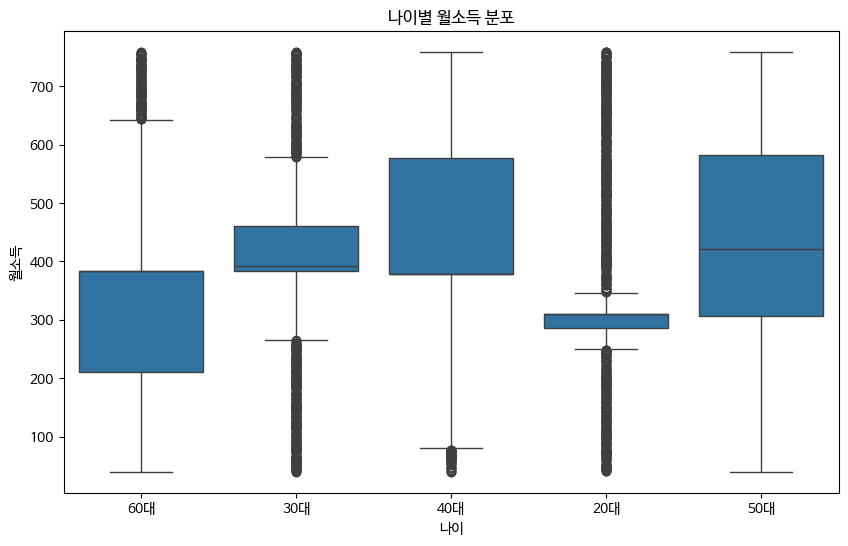

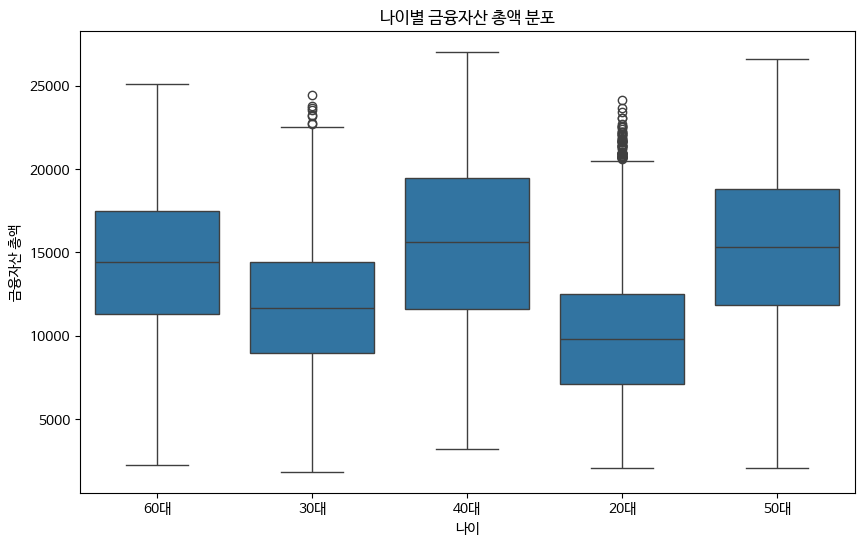

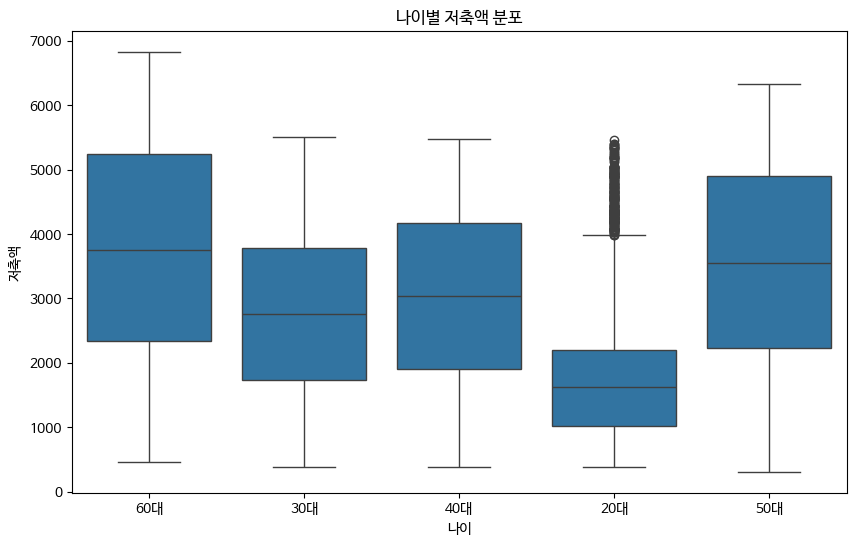

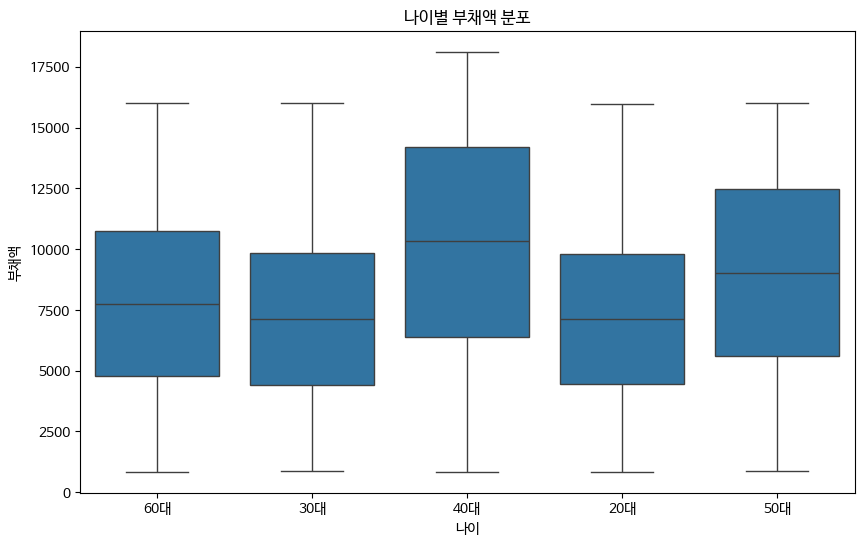

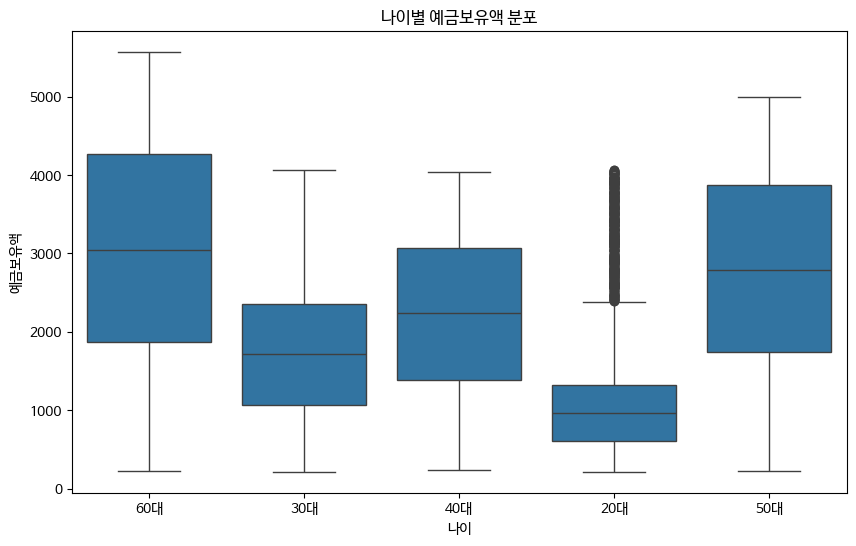

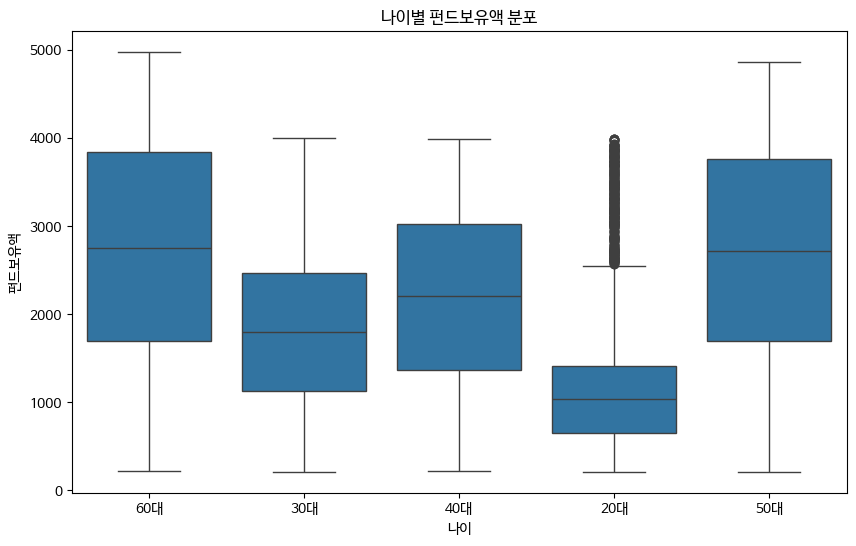

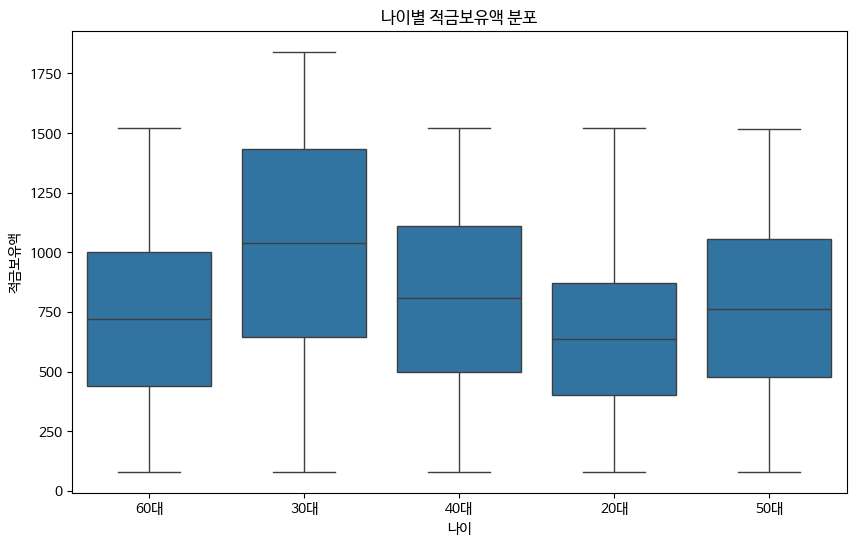

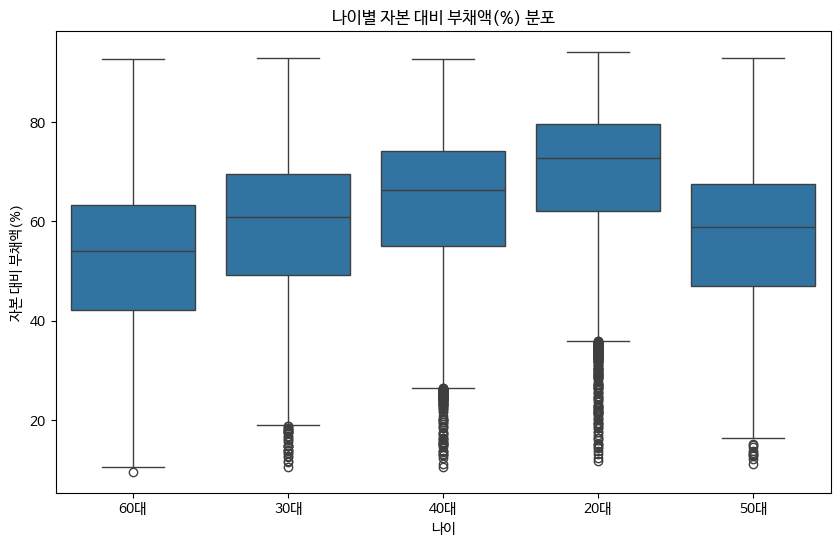

In [ ]:
# prompt: data에서 나이 별로 "월소득	금융자산 총액	저축액	부채액	예금보유액	펀드보유액	적금보유액	자본 대비 부채액(%)" 의 분포를 보여주는 시각화

import seaborn as sns

# 나이별 '월소득', '금융자산 총액', '저축액', '부채액', '예금보유액', '펀드보유액', '적금보유액', '자본 대비 부채액(%)' 분포 시각화
for column in ['월소득', '금융자산 총액', '저축액', '부채액', '예금보유액', '펀드보유액', '적금보유액', '자본 대비 부채액(%)']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='나이', y=column, data=data)
    plt.title(f'나이별 {column} 분포')
    plt.show()

# 클러스터링 Test

# Elbow 모델을 통한 최적 클러스터 수 도출

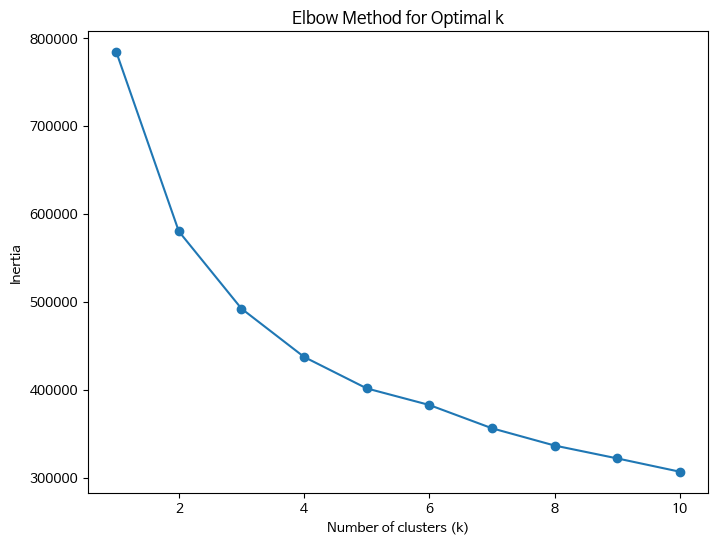

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 데이터 로드 (X: 원본 데이터프레임으로 가정)
X = data  # 데이터 파일 이름을 실제 파일 경로로 교체
X = X.drop(['ID', '비밀번호'], axis=1)

# 1. 카테고리형 변수 원-핫 인코딩
categorical_features = ['성별','나이','직장']
numerical_features = [col for col in X.columns if col not in categorical_features]

# 컬럼별 전처리 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# 데이터 전처리 파이프라인
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_processed = pipeline.fit_transform(X)

# 2. 최적의 클러스터 수 찾기
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# 엘보우 플롯 시각화
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# K-means clustering Test

Centroids in high-dimensional space:
 [[ 0.00974627 -0.70083789 -0.65421065 -0.65414501 -0.12242445  0.75575876
   0.38299064  0.92929107  0.4967089   0.17113707  0.28192365  0.22642751
   0.08503373  0.71910482]
 [ 0.13252389  0.8358552   0.7857632   0.76234599  0.31897164 -0.85238057
  -0.37289442 -1.22861681  0.49172322  0.28439235  0.20290973  0.31426074
   0.18630475  0.74573309]
 [-0.34040965 -0.80856304 -0.80567317 -0.59029385 -0.45498828 -0.83704477
  -1.07812927 -0.06137362  0.52623437  0.22951313  0.12595075  0.12689614
   0.08237721  0.68424219]
 [ 0.26490851  1.01633897  1.00460147  0.76815701  0.38174549  0.91754288
   1.19477912  0.14203093  0.48122212  0.14166407  0.32389252  0.37747692
   0.14617699  0.7432825 ]]


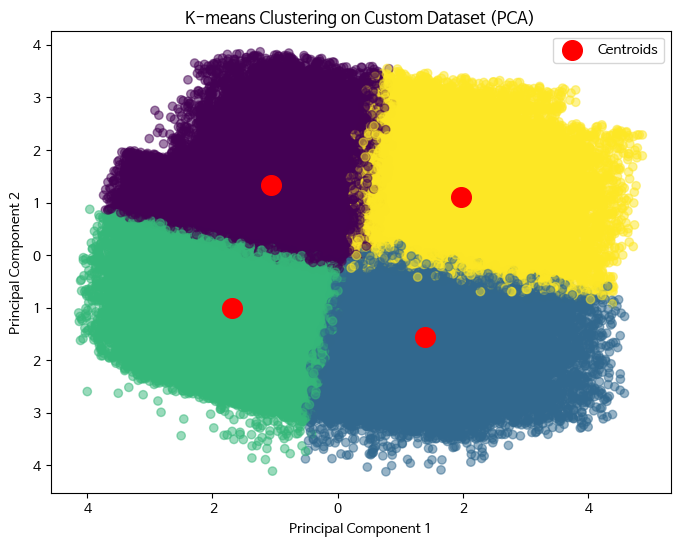

In [ ]:
# 3. K-means 클러스터링 모델 생성 및 학습 (최적의 클러스터 수 k=4로 가정)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_processed)

# 4. 고차원에서 센트로이드 확인
centroids_high_dim = kmeans.cluster_centers_
print("Centroids in high-dimensional space:\n", centroids_high_dim)

# # 클러스터 품질 평가 (Silhouette Score와 Davies-Bouldin Index)
# silhouette_avg = silhouette_score(X_processed, clusters)
# davies_bouldin_avg = davies_bouldin_score(X_processed, clusters)

# 5. 결과 시각화 - PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)
centroids_pca = pca.transform(centroids_high_dim)

# 차원 축소된 데이터와 센트로이드 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on Custom Dataset (PCA)")
plt.legend()
plt.show()

# print(silhouette_avg)
# print(davies_bouldin_avg)

# PCA 해석

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# 원-핫 인코딩된 후 열 이름 가져오기
onehot_features = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numerical_features + list(onehot_features)

# PCA 모델 학습
pca = PCA(n_components=2)  # 여기서는 2개의 주성분을 사용한 경우
pca.fit(X_processed)

# PCA 구성 요소 확인 (각 주성분이 원본 변수에 기여하는 비율)
pca_components = pd.DataFrame(pca.components_, columns=all_features, index=[f"PC{i+1}" for i in range(pca.n_components_)])

# 각 주성분이 원본 변수에 기여하는 비율을 출력
pca_components


,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),성별_여자,나이_30대,나이_40대,나이_50대,나이_60대,직장_Y
PC1,0.131049,0.530497,0.520976,0.411918,0.25962,0.103647,0.321639,-0.268126,-0.013383,-0.012107,0.021152,0.069606,0.031444,0.014526
PC2,0.117311,-0.073459,-0.051160,-0.124800,0.02934,0.634640,0.519444,0.529105,-0.016005,-0.049853,0.074644,0.018741,-0.023383,0.006053


### 1. **PCA 주성분 분석**
   - **PC1**: 저축액, 예금 보유액, 적금 보유액 등 금융 자산 변수들이 높은 비중을 차지하고 있습니다. 이는 PC1이 주로 **금융 자산의 총량**을 설명한다고 볼 수 있습니다. 이 축이 클수록 개인의 금융 자산이 많다는 의미로 해석될 수 있습니다.
   - **PC2**: 부채액과 금융자산 총액이 높은 기여도를 가지고 있습니다. PC2는 **부채의 존재 여부와 금융자산의 상관관계**를 나타내며, 부채가 클수록 더 높은 값을 가질 가능성이 있습니다. 따라서 PC2는 자산과 부채 간의 균형, 즉 **부채를 고려한 자산 상황**을 설명하는 축일 수 있습니다.
------------------
### 2. **클러스터 해석**
   PCA 차원 축소 후 클러스터링을 적용한 결과를 통해 각 클러스터가 다음과 같은 의미를 가짐:

1. **보라색 클러스터 cluster: 0(저자산, 고부채 그룹)**:
   - PC1은 낮지만 이에 반해 PC2는 상대적으로 높은 값을 가지는 클러스터.
   - 이 그룹은 **금융 자산은 적은 반면 대출과 같은 부채가 많은 그룹**으로 볼 수 있음. 경제적으로 어려움을 겪고 있을 확률이 높고, 그 만큼 재정적인 안정성이 낮은 상태일 가능성이 높음.

2. **노란색 클러스터 cluster: 3(고자산, 고부채 그룹)**:
   - PC1과 PC2 모두 높은 값을 가지는 클러스터.
   - 이 그룹은 **높은 금융 자산과 동시에 높은 부채**를 가진 그룹으로 볼 수 있음. 재정적으로 큰 자산을 보유하고 있지만 동시에 많은 부채도 가지고 있음(주로 사업하는 사람들이 이런 유형이지 않을까?). 부채를 감당하면서 자산을 운용하는 경우로, 고위험 고수익을 추구하는 사람일 가능성도 있음.

3. **초록색 클러스터 cluster: 2(저자산, 저부채 그룹)**:
   - PC1 과 PC2 값이 모두 낮은 클러스터.
   - 이 그룹은 다른 그룹에 비해 **금융 자산도 적고 부채도 적은 그룹**으로 안정적으로 볼 수 있지만, 절대적인 재산의 양은 많지 않은 그룹이라고 볼 수 있음.

4. **파란색 클러스터 cluster: 1(고자산, 저부채 그룹)**:
   - PC1 값이 높고 PC2 값은 낮은 클러스터.
   - 이 그룹은 **금융 자산이 많고 부채가 적은 그룹**으로 볼 수 있음. 가장 경제적으로 안정적이라고 볼 수 있는 그룹.






# 모델 저장 및 동작 확인

In [ ]:
# 모델을 pkl 파일로 저장

import joblib

joblib.dump(kmeans, 'user_clustering_kmeans_test.pkl')
print("모델이 'user_clustering_kmeans_test.pkl'로 저장되었습니다.")

모델이 'user_clustering_kmeans_test.pkl'로 저장되었습니다.


In [ ]:
import numpy as np
import joblib

# 저장된 모델과 전처리 파이프라인 로드
kmeans_model = joblib.load('user_clustering_kmeans_test.pkl')

# 예를 들어 예측하려는 새로운 데이터 (원본 데이터와 동일한 컬럼을 가져야 함)
new_data = pd.DataFrame({
    '성별': ['남자'],
    '나이': ['30대'],
    '직장': ['Y'],
    '월소득': [150],
    '금융자산 총액': [15000],
    '저축액': [1000],
    '부채액': [14000],
    '예금보유액': [500],
    '적금보유액': [500],
    '펀드보유액': [0],
    '자본 대비 부채액(%)': [90]
})

# 원본 파이프라인을 사용해 데이터 전처리 (앞서 정의한 pipeline 객체를 재사용할 수 있음)
new_data_processed = pipeline.transform(new_data)

# 클러스터 예측
predicted_cluster = kmeans_model.predict(new_data_processed)

print(f"새로운 데이터는 클러스터 {predicted_cluster[0]}에 속합니다.")


새로운 데이터는 클러스터 0에 속합니다.


# 클러스터 분석 결과 시각화

In [ ]:
clusters

array([1, 0, 2, ..., 3, 1, 0], dtype=int32)

In [ ]:
cluster = pd.DataFrame(clusters, columns=['cluster'])

cluster_data = pd.concat([data, cluster], axis=1)

In [ ]:
cluster_data.to_csv('1107_cluster_data.csv', index=False)

## 1. 당신과 같은 그룹에 속하는 사람은 몇 명인가

<Axes: xlabel='cluster', ylabel='count'>

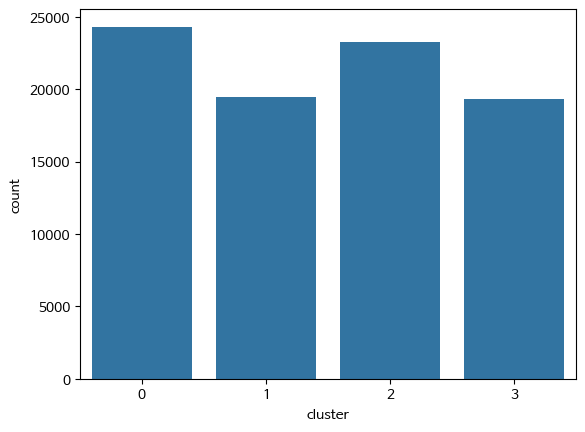

In [ ]:
sns.barplot(cluster_data['cluster'].value_counts())

# 각 클러스터별로 데이터 분석

In [ ]:
cluster_data.head(10)

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),cluster
0,user1,1234,남자,60대,Y,383,5036.764706,4110.0,926.764706,2446,5074.0,12556.764706,40.408498,1
1,user2,1234,여자,30대,Y,383,2392.857143,1474.0,918.857143,2002,9443.0,13837.857143,68.240334,0
2,user3,1234,남자,40대,Y,577,2206.802721,1622.0,584.802721,1323,3441.0,6970.802721,49.363038,2
3,user4,1234,남자,60대,Y,383,1528.186275,1247.0,281.186275,4707,4490.0,10725.186275,41.864075,2
4,user5,1234,여자,30대,Y,383,2358.766234,1453.0,905.766234,617,5030.0,8005.766234,62.829714,2
5,user6,1234,남자,30대,Y,461,2845.779221,1753.0,1092.779221,1287,9260.0,13392.779221,69.141736,0
6,user7,1234,여자,20대,Y,286,2269.875630,1356.0,913.875630,1375,9040.0,12684.875630,71.265973,0
7,user8,1234,남자,30대,Y,461,2847.402597,1754.0,1093.402597,1689,8509.0,13045.402597,65.226044,0
8,user9,1234,여자,50대,Y,306,3029.187817,2387.0,642.187817,2153,5626.0,10808.187817,52.053129,2
9,user10,1234,여자,20대,N,286,1824.605042,1090.0,734.605042,1708,2630.0,6162.605042,42.676757,2


In [ ]:
cluster_data[cluster_data['cluster'] == 0].describe()

,비밀번호,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),cluster
count,24319.0,24319.000000,24319.000000,24319.000000,24319.000000,24319.000000,24319.000000,24319.000000,24319.000000,24319.0
mean,1234.0,403.454172,1883.222388,1331.463300,551.759087,1961.368560,11428.021095,15272.612042,74.890298,0.0
std,0.0,123.770476,715.543649,578.591903,251.656586,1108.185471,2406.010191,2842.136336,7.522038,0.0
min,1234.0,40.000000,311.000000,216.000000,80.000000,210.000000,6439.000000,9102.000000,49.552459,0.0
25%,1234.0,306.000000,1296.954315,884.000000,352.207792,1061.000000,9571.500000,13105.250872,69.889985,0.0
50%,1234.0,378.000000,1873.149580,1288.000000,513.588832,1690.000000,11049.000000,14759.025974,75.334714,0.0
75%,1234.0,577.000000,2445.431472,1731.000000,706.666667,2762.000000,12718.000000,17166.435802,80.310583,0.0
max,1234.0,759.000000,4073.000000,3833.000000,1518.000000,4975.000000,18124.000000,24126.387755,94.143336,0.0


In [ ]:
cluster_data[cluster_data['cluster'] == 1].describe()

,비밀번호,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),cluster
count,19450.0,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.0
mean,1234.0,418.811671,4204.691883,3111.143753,1093.548130,2473.639486,5053.851003,11732.182371,42.231968,1.0
std,0.0,125.330435,991.846331,925.889029,324.383954,1136.129450,1837.546255,2380.219793,10.516826,0.0
min,1234.0,40.000000,1459.000000,245.000000,80.000000,215.000000,843.000000,4999.000000,9.642124,1.0
25%,1234.0,306.000000,3458.500000,2405.000000,854.850340,1541.000000,3490.250000,9982.149955,34.353695,1.0
50%,1234.0,383.000000,4116.879036,2919.000000,1089.566627,2410.500000,4997.000000,11779.370130,42.799957,1.0
75%,1234.0,577.000000,4817.515306,3741.000000,1299.401361,3302.000000,6618.000000,13480.315006,50.288872,1.0
max,1234.0,758.000000,6828.431373,5572.000000,1840.207792,4977.000000,8899.000000,18713.754902,68.762592,1.0


In [ ]:
cluster_data[cluster_data['cluster'] == 2].describe()

,비밀번호,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),cluster
count,23248.0,23248.000000,23248.000000,23248.000000,23248.000000,23248.00000,23248.000000,23248.000000,23248.000000,23248.0
mean,1234.0,360.325748,1722.993342,1146.508259,576.485083,1581.46989,5107.106504,8411.569736,59.848391,2.0
std,0.0,103.486824,675.259947,513.570779,263.303358,967.83204,1832.595647,2159.481487,12.486489,0.0
min,1234.0,40.000000,335.000000,220.000000,80.000000,211.00000,857.000000,1838.000000,13.822475,2.0
25%,1234.0,286.000000,1176.948052,765.000000,356.472081,857.00000,3572.750000,6782.990260,51.141592,2.0
50%,1234.0,310.000000,1714.205042,1117.500000,539.190222,1362.00000,5122.000000,8499.582888,60.413076,2.0
75%,1234.0,383.000000,2247.619048,1465.250000,776.389916,2095.00000,6634.000000,10075.624370,69.059310,2.0
max,1234.0,758.000000,4160.000000,4025.000000,1519.000000,4972.00000,9377.000000,14797.000000,92.949196,2.0


In [ ]:
cluster_data[cluster_data['cluster'] == 3].describe()

,비밀번호,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),cluster
count,19292.0,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.0
mean,1234.0,435.306396,4473.388945,3378.323502,1095.065443,2546.943655,12077.214908,19097.547508,62.975836,3.0
std,0.0,130.454850,916.772663,844.005827,268.439262,1144.045452,2502.983629,2769.126861,7.064151,0.0
min,1234.0,40.000000,2186.000000,826.000000,90.000000,215.000000,7342.000000,12587.319728,39.005315,3.0
25%,1234.0,306.000000,3753.069583,2720.000000,901.721088,1605.000000,10010.000000,16914.602644,58.216716,3.0
50%,1234.0,383.000000,4390.862944,3287.500000,1093.170068,2529.000000,11785.000000,18896.000000,63.319724,3.0
75%,1234.0,577.000000,5095.802852,3903.000000,1269.578680,3441.000000,13925.250000,21194.511284,68.006105,3.0
max,1234.0,759.000000,6827.205882,5571.000000,1840.207792,4977.000000,18124.000000,27042.149660,82.509705,3.0


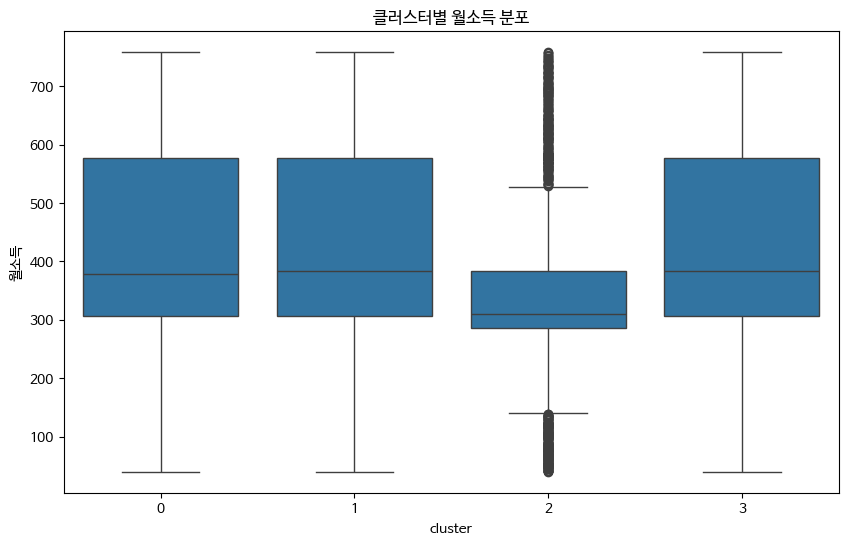

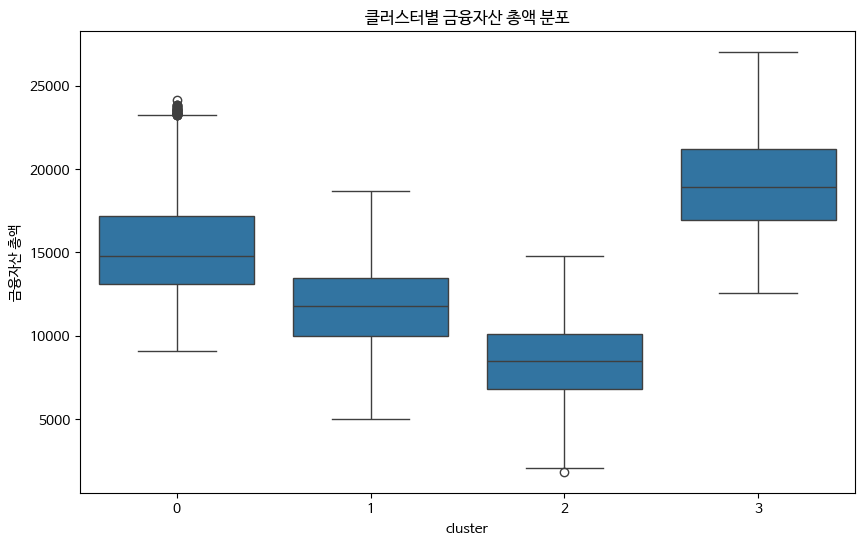

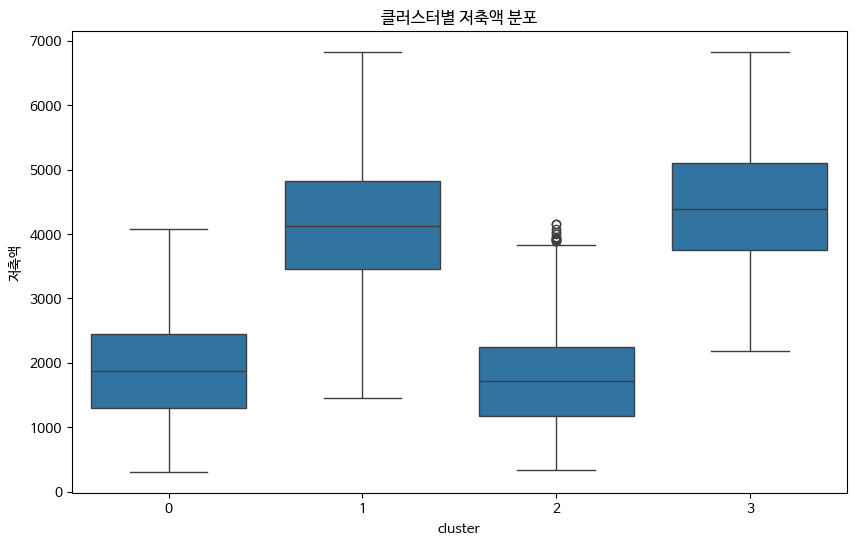

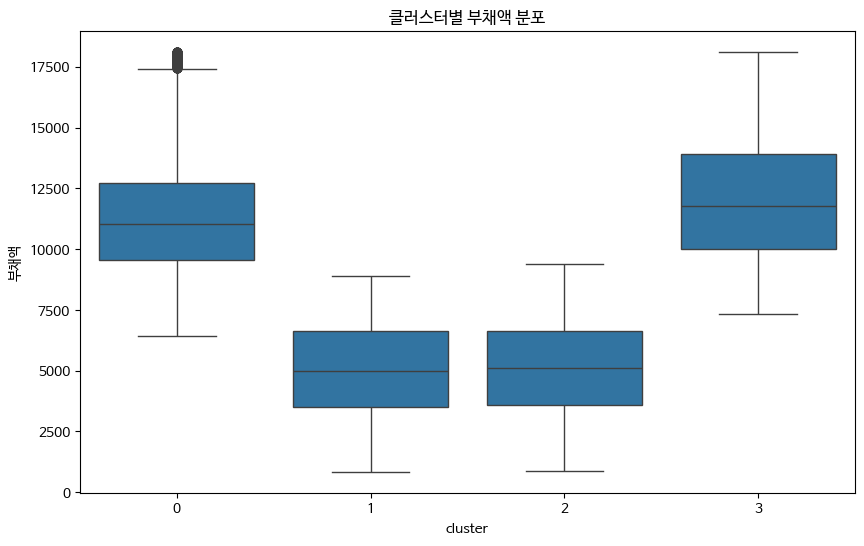

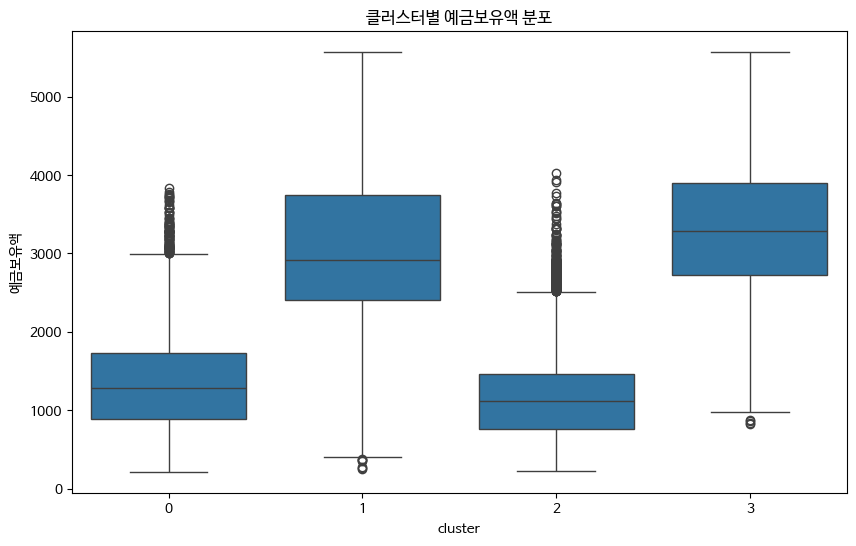

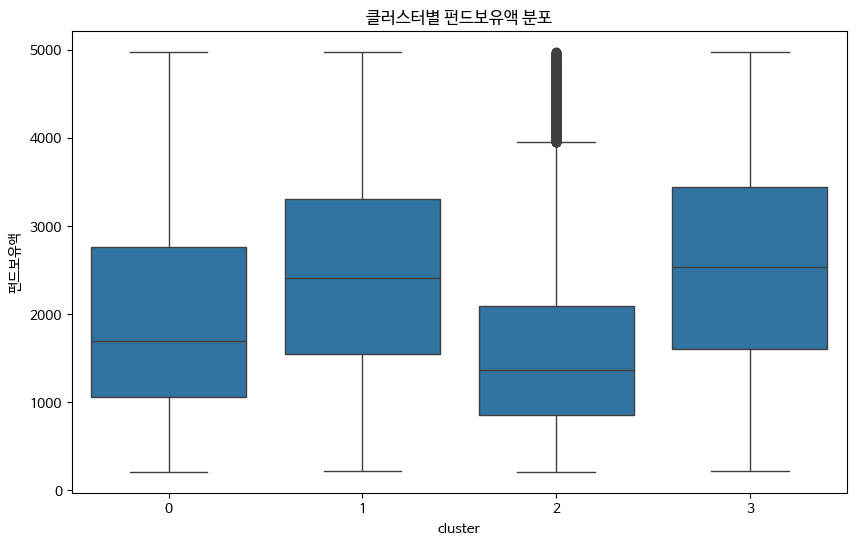

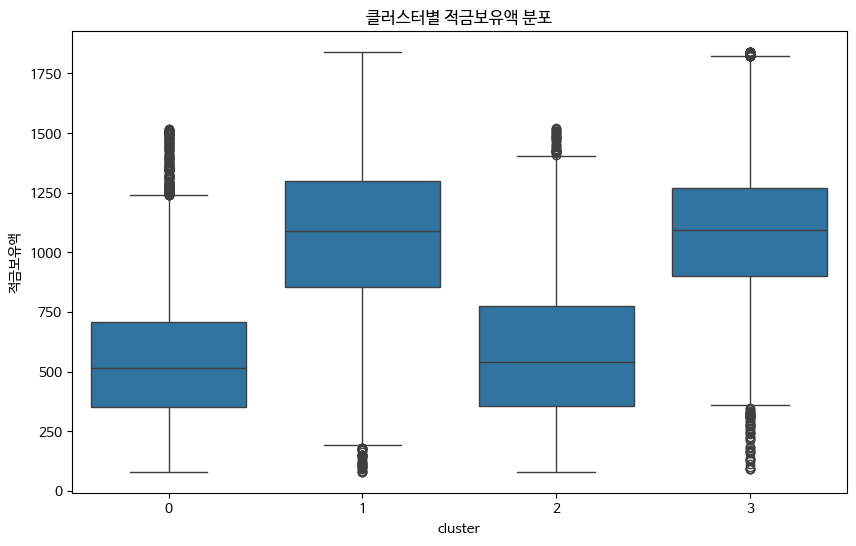

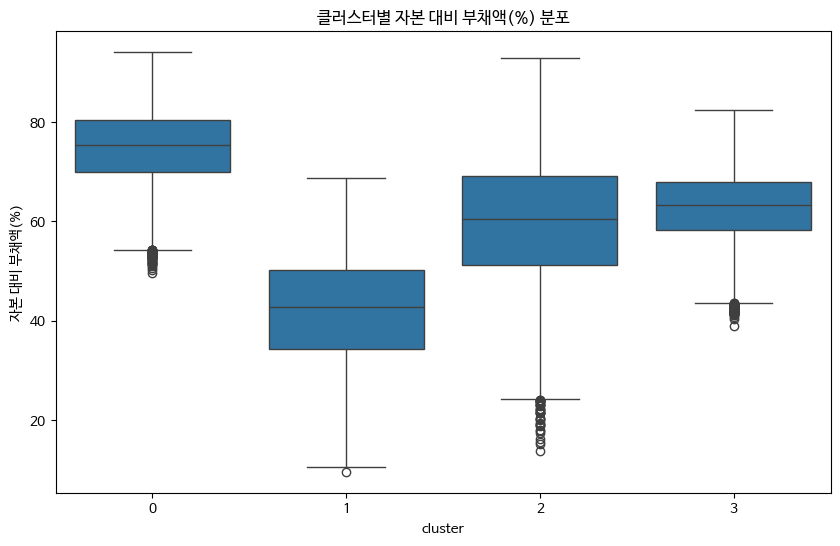

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# 나이별 '월소득', '금융자산 총액', '저축액', '부채액', '예금보유액', '펀드보유액', '적금보유액', '자본 대비 부채액(%)' 분포 시각화
for column in ['월소득', '금융자산 총액', '저축액', '부채액', '예금보유액', '펀드보유액', '적금보유액', '자본 대비 부채액(%)']:
    plt.figure(figsize=(10, 6))
    # Assuming 'cluster' is the actual column name in your DataFrame
    sns.boxplot(x='cluster', y=column, data=cluster_data)  # Change 'clusters' to 'cluster'
    plt.title(f'클러스터별 {column} 분포')
    plt.show()